In [1]:
pip install pandas numpy matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
survey = pd.read_csv("CP1 Stack Overflow Database.csv")
print(survey)

       ResponseId     Q120                      MainBranch  \
0               1  I agree                   None of these   
1               2  I agree  I am a developer by profession   
2               3  I agree  I am a developer by profession   
3               4  I agree  I am a developer by profession   
4               5  I agree  I am a developer by profession   
...           ...      ...                             ...   
89179       89180  I agree  I am a developer by profession   
89180       89181  I agree  I am a developer by profession   
89181       89182  I agree     I code primarily as a hobby   
89182       89183  I agree  I am a developer by profession   
89183       89184  I agree  I am a developer by profession   

                      Age                                         Employment  \
0         18-24 years old                                                NaN   
1         25-34 years old                                Employed, full-time   
2         45-54

In [4]:
numeric_columns = survey.select_dtypes(include=['int', 'float','int64','float64']).columns
num_numeric_columns = len(numeric_columns)
print(f"{num_numeric_columns} são colunas numericas no DF survey")
mem_usage_mb = survey.memory_usage(deep=True).sum() / (1024 * 1024)
print(f"{mem_usage_mb} MBs no DF survey")

4 são colunas numericas no DF survey
475.57747077941895 MBs no DF survey


In [5]:
survey_new = survey[['MainBranch', 'Age', 'Employment', 'RemoteWork', 'EdLevel',
                 'DevType', 'OrgSize', 'Country', 'ConvertedCompYearly',
                 'WorkExp', 'Industry']]
print(survey_new)

                           MainBranch                 Age  \
0                       None of these     18-24 years old   
1      I am a developer by profession     25-34 years old   
2      I am a developer by profession     45-54 years old   
3      I am a developer by profession     25-34 years old   
4      I am a developer by profession     25-34 years old   
...                               ...                 ...   
89179  I am a developer by profession     25-34 years old   
89180  I am a developer by profession     18-24 years old   
89181     I code primarily as a hobby   Prefer not to say   
89182  I am a developer by profession  Under 18 years old   
89183  I am a developer by profession     35-44 years old   

                                              Employment  \
0                                                    NaN   
1                                    Employed, full-time   
2                                    Employed, full-time   
3                          

In [6]:
numeric_columns = survey_new.select_dtypes(include=['int', 'float','int64','float64']).columns
print(f"{num_numeric_columns} são colunas numericas no DF survey_new")
mem_usage_mb = survey_new.memory_usage(deep=True).sum() / (1024 * 1024)
print(f"{mem_usage_mb} MBs no DF survey_new")

4 são colunas numericas no DF survey_new
64.03391933441162 MBs no DF survey_new


In [7]:
# Calcular a média
media = survey_new['WorkExp'].mean()

# Calcular a mediana
mediana = survey_new['WorkExp'].median()

# Calcular o desvio-padrão
desvio_padrao = survey_new['WorkExp'].std()

# Calcular o valor máximo
maximo = survey_new['WorkExp'].max()

# Calcular o valor mínimo
minimo = survey_new['WorkExp'].min()

print("Média:", media)
print("Mediana:", mediana)
print("Desvio-padrão:", desvio_padrao)
print("Valor máximo:", maximo)
print("Valor mínimo:", minimo)

Média: 11.405126322311204
Mediana: 9.0
Desvio-padrão: 9.05198941848756
Valor máximo: 50.0
Valor mínimo: 0.0


In [8]:
# Calcular o primeiro quartil (Q1)
Q1 = survey_new['WorkExp'].quantile(0.25)

# Calcular o terceiro quartil (Q3)
Q3 = survey_new['WorkExp'].quantile(0.75)

# Calcular o IQR (Intervalo Interquartil)
IQR = Q3 - Q1

# Calcular os limites superior e inferior para identificar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

print("Limite Inferior:", limite_inferior)
print("Limite Superior:", limite_superior)

Limite Inferior: -11.5
Limite Superior: 32.5


In [9]:
# Identificar outliers
outliers = survey_new[(survey_new['WorkExp'] < limite_inferior) | (survey_new['WorkExp'] > limite_superior)]
print("Outliers:")
print(outliers)

Outliers:
                                              MainBranch              Age  \
36                        I am a developer by profession  55-64 years old   
277                       I am a developer by profession  55-64 years old   
496                       I am a developer by profession  55-64 years old   
777                       I am a developer by profession  55-64 years old   
828                       I am a developer by profession  45-54 years old   
...                                                  ...              ...   
89013                     I am a developer by profession  45-54 years old   
89071  I am not primarily a developer, but I write co...  55-64 years old   
89072                     I am a developer by profession  45-54 years old   
89085                     I am a developer by profession  55-64 years old   
89137                     I am a developer by profession  55-64 years old   

                                              Employment  \
36   

In [10]:
# Contar o número de respondentes em cada categoria
contagem_por_profissao = survey_new['MainBranch'].value_counts()

# Calcular o total de respondentes
total_respondentes = contagem_por_profissao.sum()

# Calcular a porcentagem de desenvolvedores por profissão
porcentagem_desenvolvedores = (contagem_por_profissao['I am a developer by profession'] / total_respondentes) * 100

# Calcular a porcentagem de respondentes aprendendo a programar
porcentagem_aprendendo = (contagem_por_profissao['I am learning to code'] / total_respondentes) * 100

print("Porcentagem de desenvolvedores por profissão:", porcentagem_desenvolvedores)
print("Porcentagem de respondentes aprendendo a programar:", porcentagem_aprendendo)

Porcentagem de desenvolvedores por profissão: 75.39132579834948
Porcentagem de respondentes aprendendo a programar: 5.562656978830283


In [11]:
# Convertendo as colunas relevantes para um tipo numérico
survey['ConvertedCompYearly'] = pd.to_numeric(survey['ConvertedCompYearly'], errors='coerce')
survey['YearsCode'] = pd.to_numeric(survey['YearsCode'], errors='coerce')

# Imprimir informações das colunas 'Salary' e 'YearsCode' para verificar se há valores não numéricos ou NaN
print(survey['ConvertedCompYearly'].head())
print(survey['YearsCode'].head())

# Removendo valores NaN, se houver
survey.dropna(subset=['ConvertedCompYearly', 'YearsCode'], inplace=True)

# Agrupar os respondentes pela coluna 'MainBranch' e calcular a média e mediana da remuneração e dos anos de experiência de trabalho
resultados = survey.groupby('MainBranch').agg({'ConvertedCompYearly': ['mean', 'median'], 'YearsCode': ['mean', 'median']})

print("Média e mediana da remuneração e dos anos de experiência de trabalho por grupo:")
print(resultados)

0         NaN
1    285000.0
2    250000.0
3    156000.0
4     23456.0
Name: ConvertedCompYearly, dtype: float64
0     NaN
1    18.0
2    27.0
3    12.0
4     6.0
Name: YearsCode, dtype: float64
Média e mediana da remuneração e dos anos de experiência de trabalho por grupo:
                                                   ConvertedCompYearly  \
                                                                  mean   
MainBranch                                                               
I am a developer by profession                           103678.707449   
I am not primarily a developer, but I write cod...        97130.299586   

                                                             YearsCode         
                                                     median       mean median  
MainBranch                                                                     
I am a developer by profession                      74963.0  15.536475   13.0  
I am not primarily a developer, but

In [12]:
# Contar o número de países únicos na coluna 'Country'
paises_unicos = survey_new['Country'].nunique()

print("Número de países únicos:", paises_unicos)

Número de países únicos: 185


In [13]:
# Filtrar observações para os países específicos
paises_selecionados = ['Germany', 'Sweden', 'France', 'Netherlands']
survey_country = survey_new[survey_new['Country'].isin(paises_selecionados)]

# Calcular a média da variável 'ConvertedCompYearly' para cada país
media_salarios_por_pais = survey_country.groupby('Country')['ConvertedCompYearly'].mean()

# Contar o número de observações no DataFrame 'survey_country'
observacoes_no_dataframe = len(survey_country)

# Encontrar o país com a maior média de salários
pais_maior_media_salarios = media_salarios_por_pais.idxmax()

# Calcular o desvio-padrão entre os salários para cada país
desvio_padrao_salarios_por_pais = survey_country.groupby('Country')['ConvertedCompYearly'].std()

# Encontrar o país com o maior desvio-padrão entre os salários
pais_maior_desvio_padrao = desvio_padrao_salarios_por_pais.idxmax()

print("Número de observações no dataframe 'survey_country':", observacoes_no_dataframe)
print("Média de salários por país:")
print(media_salarios_por_pais)
print("País com a maior média de salários:", pais_maior_media_salarios)
print("Desvio-padrão entre os salários por país:")
print(desvio_padrao_salarios_por_pais)
print("País com o maior desvio-padrão entre os salários:", pais_maior_desvio_padrao)

Número de observações no dataframe 'survey_country': 14285
Média de salários por país:
Country
France         65101.007773
Germany        82457.479093
Netherlands    85128.483847
Sweden         65003.224432
Name: ConvertedCompYearly, dtype: float64
País com a maior média de salários: Netherlands
Desvio-padrão entre os salários por país:
Country
France         37705.684755
Germany        52130.592088
Netherlands    59455.492620
Sweden         45948.621230
Name: ConvertedCompYearly, dtype: float64
País com o maior desvio-padrão entre os salários: Netherlands


In [14]:
# Calculando a porcentagem de desenvolvedores profissionais e aprendendo a programar em 'survey_country'
porcentagem_desenvolvedores_country = (survey_country[survey_country['MainBranch'] == 'Developer by profession'].shape[0] / survey_country.shape[0]) * 100
porcentagem_aprendendo_country = (survey_country[survey_country['MainBranch'] == 'I am learning to code'].shape[0] / survey_country.shape[0]) * 100

# Calculando a porcentagem de desenvolvedores profissionais e aprendendo a programar em 'survey_new'
porcentagem_desenvolvedores_new = (survey_new[survey_new['MainBranch'] == 'Developer by profession'].shape[0] / survey_new.shape[0]) * 100
porcentagem_aprendendo_new = (survey_new[survey_new['MainBranch'] == 'I am learning to code'].shape[0] / survey_new.shape[0]) * 100

# Comparando as porcentagens
if porcentagem_desenvolvedores_country > porcentagem_desenvolvedores_new:
    print("Há uma maior porcentagem de desenvolvedores profissionais no dataframe 'survey_country'.")
elif porcentagem_desenvolvedores_country < porcentagem_desenvolvedores_new:
    print("Há uma maior porcentagem de desenvolvedores profissionais no dataframe principal 'survey_new'.")
else:
    print("A porcentagem de desenvolvedores profissionais é a mesma em ambos os dataframes.")

if porcentagem_aprendendo_country > porcentagem_aprendendo_new:
    print("Há uma maior porcentagem de pessoas aprendendo a programar no dataframe 'survey_country'.")
elif porcentagem_aprendendo_country < porcentagem_aprendendo_new:
    print("Há uma maior porcentagem de pessoas aprendendo a programar no dataframe principal 'survey_new'.")
else:
    print("A porcentagem de pessoas aprendendo a programar é a mesma em ambos os dataframes.")

A porcentagem de desenvolvedores profissionais é a mesma em ambos os dataframes.
Há uma maior porcentagem de pessoas aprendendo a programar no dataframe principal 'survey_new'.


In [15]:
# Filtrando as observações com base nos setores de indústria especificados
setores_industria = ['Information Services, IT, Software Development, or other Technology', 'Financial Services', 'Insurance']
survey_country_ind = survey_country[survey_country['Industry'].isin(setores_industria)]

# Calculando o salário médio da coluna 'ConvertedCompYearly' para cada país com a coluna 'Country' como grupo principal e para cada indústria com a coluna 'Industry' como grupo secundário
salario_medio_por_pais_e_industria = survey_country_ind.groupby(['Country', 'Industry'])['ConvertedCompYearly'].mean()

# Encontrando a indústria de que país tem as maiores médias salariais
maiores_medias_salarios = salario_medio_por_pais_e_industria.idxmax()

# Encontrando a indústria de que país tem as menores médias salariais
menores_medias_salarios = salario_medio_por_pais_e_industria.idxmin()

print("Média salarial por país e indústria:")
print(salario_medio_por_pais_e_industria)
print("Na indústria de {} está a maior média salarial.".format(maiores_medias_salarios))
print("Na indústria de {} está a menor média salarial.".format(menores_medias_salarios))

Média salarial por país e indústria:
Country      Industry                                                           
France       Financial Services                                                      98275.422535
             Information Services, IT, Software Development, or other Technology     63104.969828
             Insurance                                                               58325.500000
Germany      Financial Services                                                      91857.378205
             Information Services, IT, Software Development, or other Technology     80239.737691
             Insurance                                                               75314.130435
Netherlands  Financial Services                                                     100696.184211
             Information Services, IT, Software Development, or other Technology     77348.600592
             Insurance                                                               66016.818182


In [16]:
# Calculando a média de anos de experiência 'WorkExp' para cada indústria 'Industry'
media_workexp_por_industria = survey_country_ind.groupby('Industry')['WorkExp'].mean()

# Encontrando a indústria com os desenvolvedores com mais experiência
maior_media_experiencia = media_workexp_por_industria.idxmax()

# Encontrando a indústria com os desenvolvedores com menos experiência
menor_media_experiencia = media_workexp_por_industria.idxmin()

print("Média de anos de experiência 'WorkExp' por indústria:")
print(media_workexp_por_industria)
print("Na indústria de {} estão os desenvolvedores com mais experiência.".format(maior_media_experiencia))
print("Na indústria de {} estão os desenvolvedores com menos experiência.".format(menor_media_experiencia))

Média de anos de experiência 'WorkExp' por indústria:
Industry
Financial Services                                                     12.024390
Information Services, IT, Software Development, or other Technology    11.531609
Insurance                                                              11.188889
Name: WorkExp, dtype: float64
Na indústria de Financial Services estão os desenvolvedores com mais experiência.
Na indústria de Insurance estão os desenvolvedores com menos experiência.


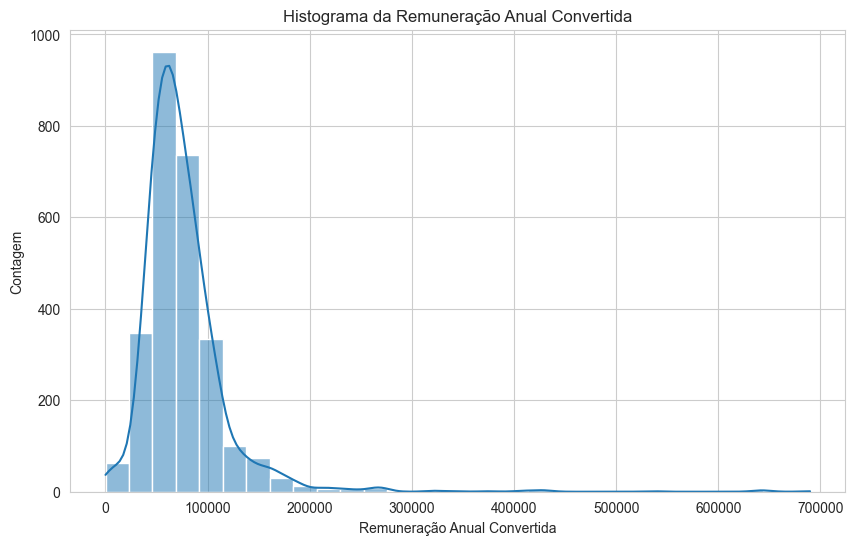

In [17]:
# Definindo o estilo do seaborn
sns.set_style("whitegrid")

# Criando o gráfico de histograma
plt.figure(figsize=(10, 6))
sns.histplot(data=survey_country_ind, x='ConvertedCompYearly', bins=30, kde=True)
plt.title('Histograma da Remuneração Anual Convertida')
plt.xlabel('Remuneração Anual Convertida')
plt.ylabel('Contagem')
plt.show()

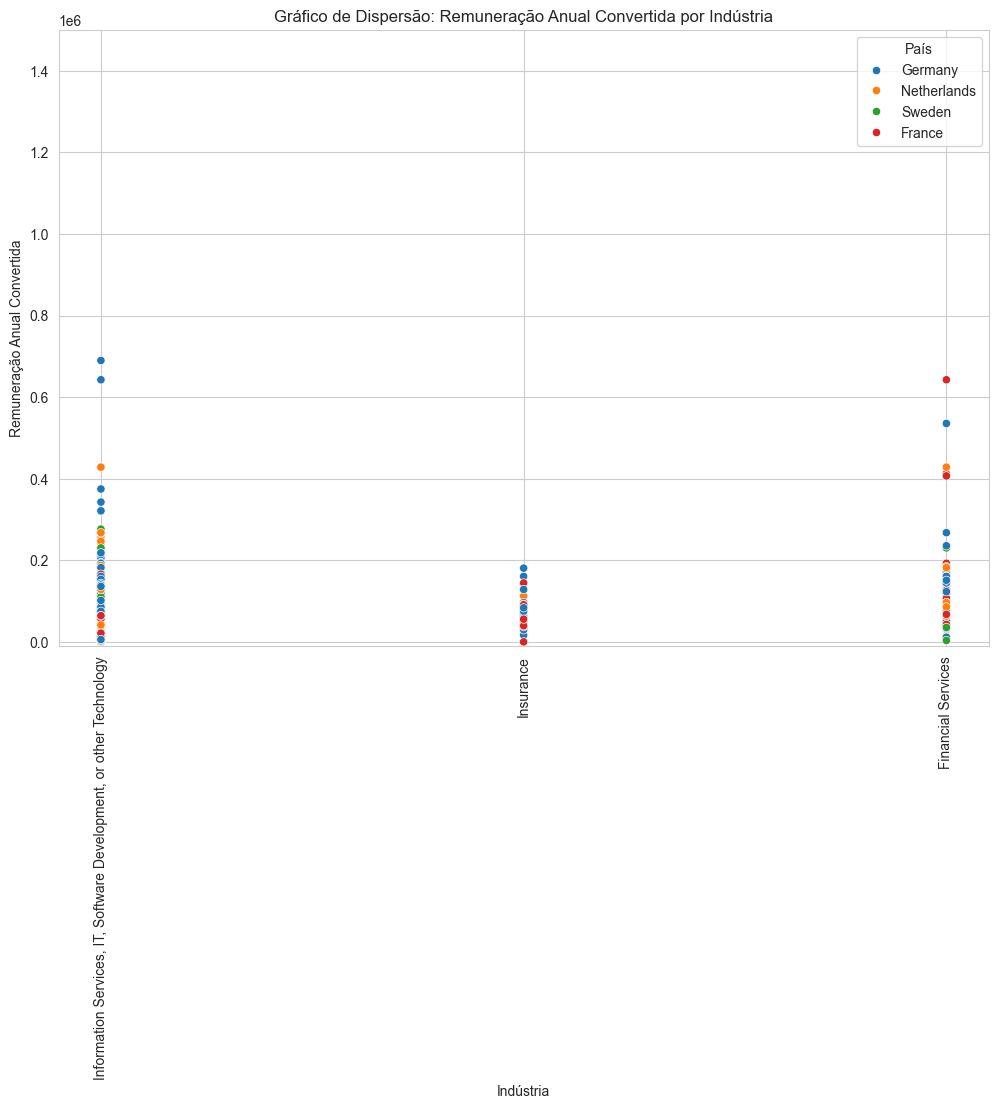

In [18]:
# Definindo o estilo do seaborn
sns.set_style("whitegrid")

# Criando o gráfico de dispersão
plt.figure(figsize=(12, 8))
scatterplot = sns.scatterplot(data=survey_country_ind, x='Industry', y='ConvertedCompYearly', hue='Country')

# Configurando os eixos e a legenda
plt.xlabel('Indústria')
plt.ylabel('Remuneração Anual Convertida')
plt.title('Gráfico de Dispersão: Remuneração Anual Convertida por Indústria')
plt.xticks(rotation=90)
plt.ylim(-10000, 1500000)  # Limitando os valores do eixo y
plt.legend(title='País')

# Mostrando o gráfico
plt.show()

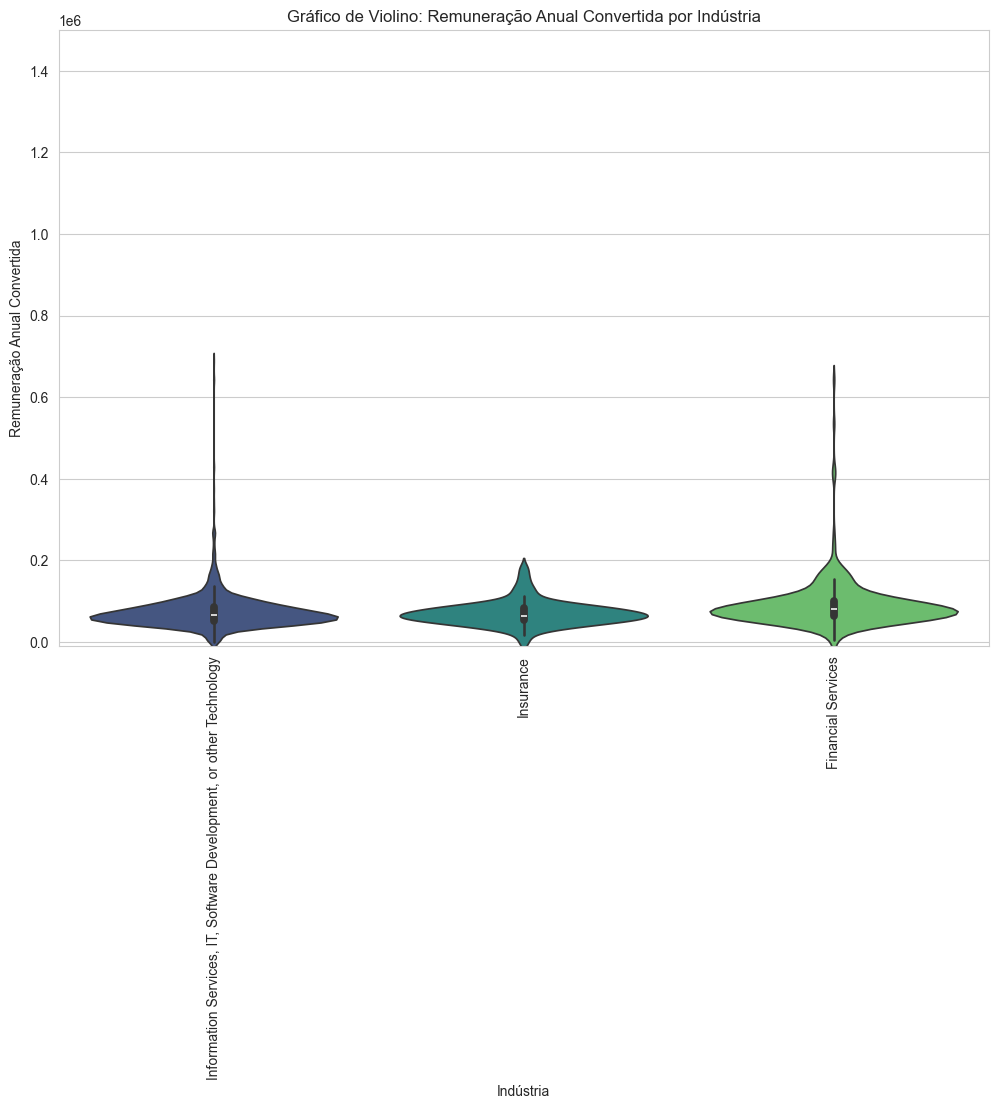

In [19]:
# Definindo o estilo do seaborn
sns.set_style("whitegrid")

# Criando o gráfico de violino
plt.figure(figsize=(12, 8))
violinplot = sns.violinplot(data=survey_country_ind, x='Industry', y='ConvertedCompYearly', hue='Industry', palette='viridis', legend=False)

# Configurando os eixos
plt.xlabel('Indústria')
plt.ylabel('Remuneração Anual Convertida')
plt.title('Gráfico de Violino: Remuneração Anual Convertida por Indústria')
plt.xticks(rotation=90)
plt.ylim(-10000, 1500000)  # Limitando os valores do eixo y

# Mostrando o gráfico
plt.show()

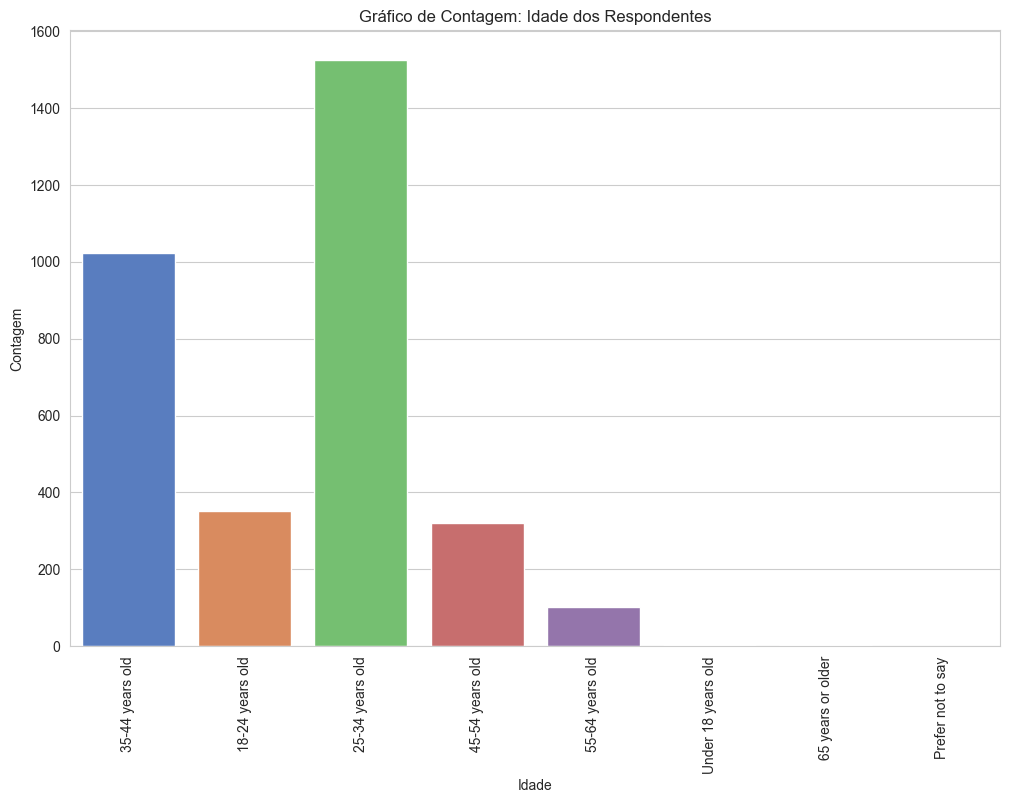

In [20]:
# Definindo o estilo do seaborn
sns.set_style("whitegrid")

# Criando o gráfico de contagem
plt.figure(figsize=(12, 8))
countplot = sns.countplot(data=survey_country_ind, x='Age', hue='Age', palette='muted', legend=False)

# Configurando os eixos
plt.xlabel('Idade')
plt.ylabel('Contagem')
plt.title('Gráfico de Contagem: Idade dos Respondentes')
plt.xticks(rotation=90)

# Mostrando o gráfico
plt.show()

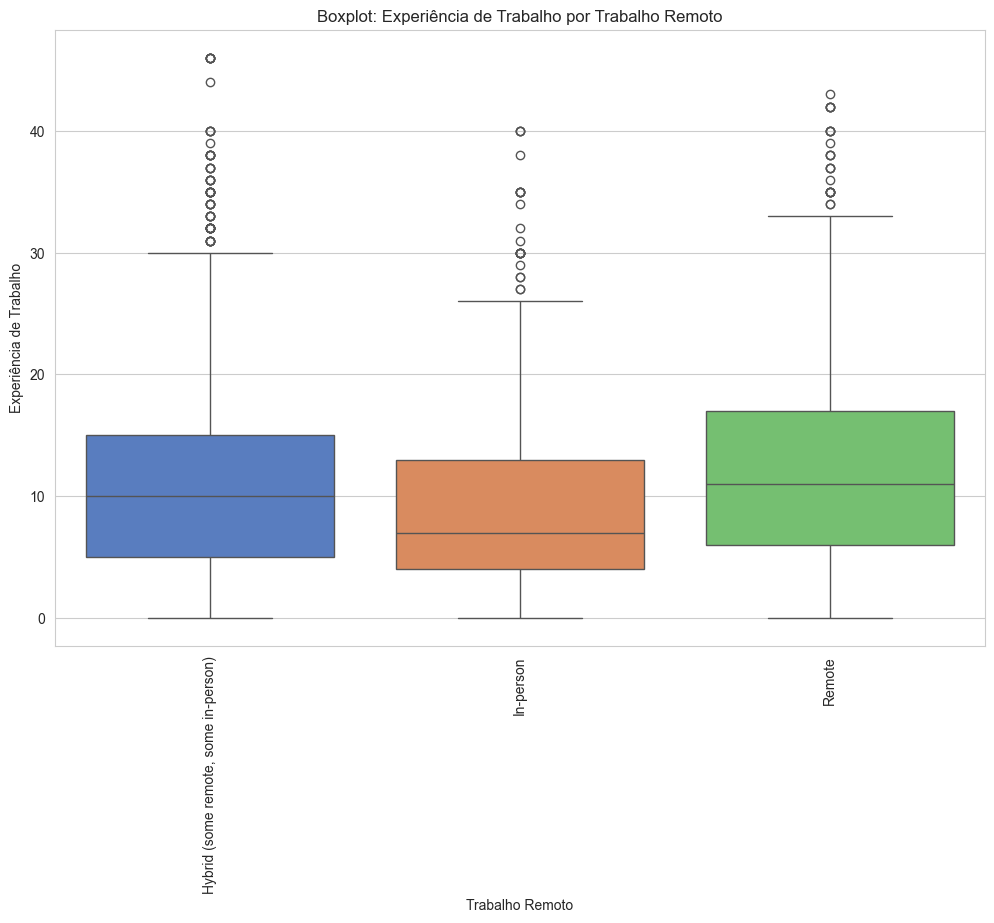

In [21]:
# Definindo o estilo do seaborn
sns.set_style("whitegrid")

# Criando o boxplot
plt.figure(figsize=(12, 8))
boxplot = sns.boxplot(data=survey_country_ind, x='RemoteWork', y='WorkExp', hue='RemoteWork', palette='muted')

# Configurando os eixos e a legenda
plt.xlabel('Trabalho Remoto')
plt.ylabel('Experiência de Trabalho')
plt.title('Boxplot: Experiência de Trabalho por Trabalho Remoto')
plt.xticks(rotation=90)

# Mostrando o gráfico
plt.show()